In [1]:
import numpy as np
import pandas as pd 

In [3]:
data_x= pd.read_csv("C://Users//HP//Desktop\ML - datasets//Assignment_4_data//Movie_collection_Independent.csv")
data_y= pd.read_csv("C://Users//HP//Desktop//ML - datasets//Assignment_4_data//Movie_collection_Target.csv")

In [15]:
data_x.shape 

(506, 19)

In [4]:
data_x.head(5)

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [5]:
data_y.head(5)

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [6]:
from sklearn.model_selection import train_test_split 
X_train_full, X_test, y_train_full, y_test = train_test_split(data_x,data_y, random_state= 42)
X_train ,X_valid,y_train ,y_valid= train_test_split(X_train_full ,y_train_full, random_state=42)

In [12]:
X_train_full.shape

(379, 19)

In [11]:
X_test.shape

(127, 19)

In [13]:
X_valid.shape

(95, 19)

In [14]:
y_test.shape

(127, 1)

In [16]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_valid= scaler.fit_transform(X_valid)
X_test= scaler.transform(X_test)

In [20]:
np.random.seed(42)


In [21]:
X_train.shape 

(284, 19)

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [31]:
from tensorflow.keras import Model

In [34]:
model = keras.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss= "mean_squared_error", 
              optimizer= keras.optimizers.SGD(lr=1e-3), 
              metrics= ['mae'])

In [40]:
model_history= model.fit(X_train ,y_train,epochs= 100,validation_data= (X_valid, y_valid))

Epoch 1/100
9/9 [==============================] - 0s 21ms/step - loss: 0.9613 - mae: 0.7489 - val_loss: 1.0987 - val_mae: 0.8201
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8798 - mae: 0.7138 - val_loss: 1.0062 - val_mae: 0.7852
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.8137 - mae: 0.6839 - val_loss: 0.9311 - val_mae: 0.7564
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7590 - mae: 0.6590 - val_loss: 0.8678 - val_mae: 0.7320
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7120 - mae: 0.6341 - val_loss: 0.8190 - val_mae: 0.7130
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6732 - mae: 0.6163 - val_loss: 0.7766 - val_mae: 0.6954
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6393 - mae: 0.6011 - val_loss: 0.7405 - val_mae: 0.6805
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6092 - mae: 0.5884 - va

9/9 [==============================] - 0s 4ms/step - loss: 0.1861 - mae: 0.3322 - val_loss: 0.3068 - val_mae: 0.4376
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1844 - mae: 0.3305 - val_loss: 0.3051 - val_mae: 0.4361
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1826 - mae: 0.3290 - val_loss: 0.3038 - val_mae: 0.4350
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1811 - mae: 0.3273 - val_loss: 0.3027 - val_mae: 0.4340
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1798 - mae: 0.3261 - val_loss: 0.3007 - val_mae: 0.4322
Epoch 69/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1784 - mae: 0.3252 - val_loss: 0.2997 - val_mae: 0.4314
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1766 - mae: 0.3232 - val_loss: 0.2982 - val_mae: 0.4301
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1753 - mae: 0.3219 - val_loss

In [42]:
#evaluating performance on test set 
mae_test= model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 1.5875 - mae: 0.5259


In [43]:
model_history.history

{'loss': [0.9612511396408081,
  0.8798197507858276,
  0.8137167692184448,
  0.7590190172195435,
  0.7120156288146973,
  0.673190176486969,
  0.6392874121665955,
  0.6092467308044434,
  0.582675039768219,
  0.5588567852973938,
  0.5367568731307983,
  0.5164265036582947,
  0.49784624576568604,
  0.4804520308971405,
  0.46484482288360596,
  0.4496082663536072,
  0.4353737235069275,
  0.4220443069934845,
  0.409370094537735,
  0.39809450507164,
  0.3866575062274933,
  0.3763726055622101,
  0.36637863516807556,
  0.35654154419898987,
  0.34707048535346985,
  0.33829009532928467,
  0.3302190899848938,
  0.3221300542354584,
  0.31453683972358704,
  0.3073692321777344,
  0.300841361284256,
  0.29451465606689453,
  0.2882418632507324,
  0.28249847888946533,
  0.2770169675350189,
  0.27152541279792786,
  0.26634442806243896,
  0.2616178095340729,
  0.25706616044044495,
  0.25254854559898376,
  0.24855701625347137,
  0.2442532628774643,
  0.24047841131687164,
  0.23704198002815247,
  0.2331202626

In [45]:
import matplotlib.pyplot as plt 

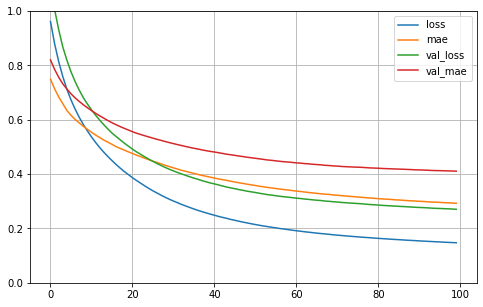

In [46]:
pd.DataFrame(model_history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [47]:
X_new= X_test[:5]

In [49]:
y_pred= model.predict(X_new)
print(y_pred)

[[2.4630585]
 [2.6132998]
 [2.2243748]
 [2.065474 ]
 [2.0745697]]
